<a href="https://colab.research.google.com/github/arya-sharma-codes/Ads/blob/main/Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd#importing pandas
import numpy as np#importing numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#Exploratory Data Analysis

In [ ]:
data.groupby(['Gender']).sum()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,3201435452,7836,14639000,77
Male,3075180451,7226,13258000,66


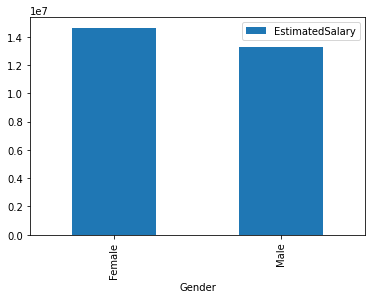

In [ ]:
data.groupby(['Gender']).sum().plot(kind='bar',y='EstimatedSalary')#no use in seeing the ads purchased analysis nit still

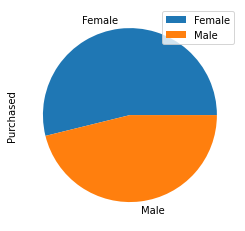

In [ ]:
data.groupby(['Gender']).sum().plot(kind='pie',y='Purchased')

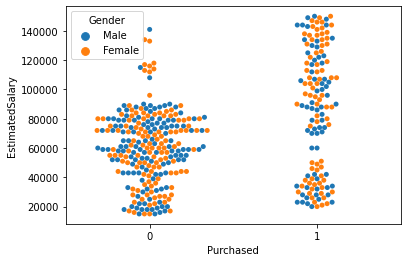

In [ ]:
#Swarmplot to show the purchased items with respect to estimated salary and hue gender
vis1 = sns.swarmplot(x ='Purchased', y='EstimatedSalary', hue='Gender', data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


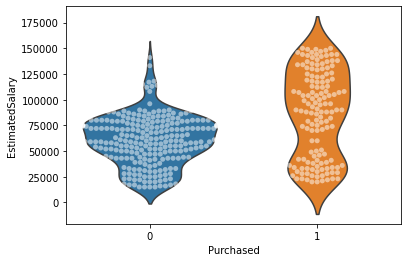

In [ ]:
#swarmplot with violinplot
sns.violinplot(x="Purchased", y="EstimatedSalary", data=data, inner=None)
vis2= sns.swarmplot(x="Purchased",y="EstimatedSalary",color="w",data=data, alpha=0.5)

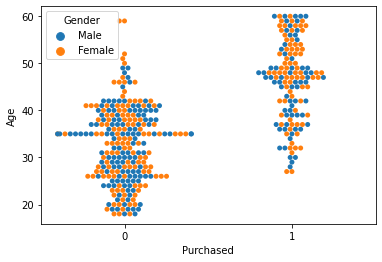

In [ ]:
#Plot to show purchase with rspect to age and hue Gender
vis3 = sns.swarmplot(x ='Purchased', y='Age', hue='Gender', data = data)

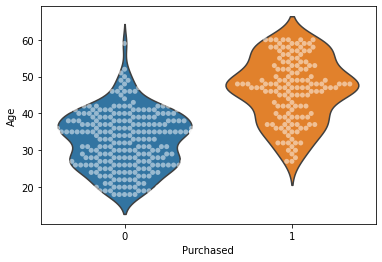

In [ ]:
#
#Plot to show purchase with respect to age
sns.violinplot(x="Purchased", y="Age", data=data, inner=None)
vis4 = sns.swarmplot(x="Purchased",y="Age",color="w",data=data, alpha=0.5)

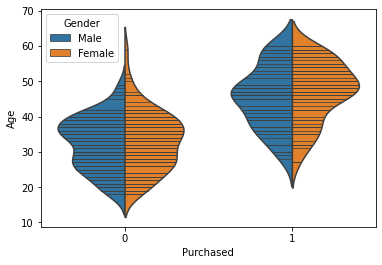

In [ ]:
vis5 = sns.violinplot(x="Purchased", y="Age", hue="Gender", data = data, split = True,inner="stick")

In [ ]:
#Machine Learning Model

In [ ]:
#Considering the independent and dependent variables
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

In [ ]:
#Spltting the data into train and test data with a split of 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Feature Scaling
#Using Standard Scaler and fitting both train and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:

from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression()
classifier1.fit(X_train, y_train)
#score1 = accuracy_score(y_test, model1.predict(X_test))

# Predicting the Test set results
y_pred = classifier1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score
conf_mat1 = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
RecallScore1 = recall_score(y_test,y_pred)
PrecisionScore1 = precision_score(y_test,y_pred)

print("Confusion Matrix",conf_mat1)
print("Accuracy",accuracy1)
print("RecallScore",RecallScore1)
print("PrecisionScore",PrecisionScore1)

Confusion Matrix [[57  1]
 [ 5 17]]
Accuracy 0.925
RecallScore 0.7727272727272727
PrecisionScore 0.9444444444444444


In [ ]:
#Using KNN model for classification
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier2.predict(X_test)

#computing metrics
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score
conf_mat2 = confusion_matrix(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)
recall_score2 = recall_score(y_test,y_pred)
precision_score2= precision_score(y_test,y_pred)

print("Confusion Matrix",conf_mat2)
print("Accuracy",accuracy2)
print("RecallScore",recall_score2)
print("PrecisionScore",precision_score2)

Confusion Matrix [[55  3]
 [ 1 21]]
Accuracy 0.95
RecallScore 0.9545454545454546
PrecisionScore 0.875


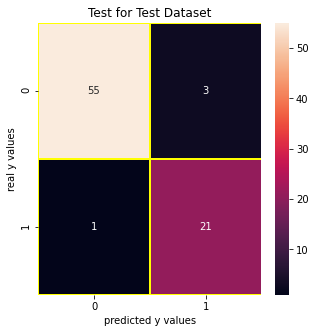

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(conf_mat,annot = True,linewidths=0.5,linecolor="yellow",fmt = ".0f",ax=ax)
sns.heatmap()
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [ ]:
#Using  Random Forest Classifier for classification
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=5)
classifier3.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier3.predict(X_test)

#computing metrics
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score
conf_mat3 = confusion_matrix(y_test, y_pred)
accuracy3 = accuracy_score(y_test, y_pred)
recall_score3 = recall_score(y_test,y_pred)
precision_score3= precision_score(y_test,y_pred)

print("Confusion Matrix",conf_mat3)
print("Accuracy",accuracy3)
print("RecallScore",recall_score3)
print("PrecisionScore",precision_score3)






Confusion Matrix [[54  4]
 [ 2 20]]
Accuracy 0.925
RecallScore 0.9090909090909091
PrecisionScore 0.8333333333333334


In [ ]:
#Using SVM for classification
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf',  random_state = 2)
classifier4.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier4.predict(X_test)

#computing metrics
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score
conf_mat4 = confusion_matrix(y_test, y_pred)
accuracy4 = accuracy_score(y_test, y_pred)
recall_score4 = recall_score(y_test,y_pred)
precision_score4= precision_score(y_test,y_pred)

print("Confusion Matrix",conf_mat4)
print("Accuracy",accuracy4)
print("RecallScore",recall_score4)
print("PrecisionScore",precision_score4)


Confusion Matrix [[55  3]
 [ 1 21]]
Accuracy 0.95
RecallScore 0.9545454545454546
PrecisionScore 0.875
